<a href="https://colab.research.google.com/github/Foysal348/All-Linear-Regression/blob/main/Simple_Linear_Regression_for_Salary_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Simple Linear Regression for Salary Calculation

In [30]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

df=pd.read_csv("/content/sample_data/employee_salary_data.csv")
print(df)

    Unnamed: 0  YearsExperience     Salary
0            0              6.2   73285.69
1            1             14.3  151410.21
2            2             11.2  125525.69
3            3              9.4  106476.74
4            4              3.2   53330.21
..         ...              ...        ...
95          95              7.9  100535.11
96          96              8.3   99565.88
97          97              7.0   91582.70
98          98              1.4   37037.80
99          99              2.5   51043.60

[100 rows x 3 columns]


In [31]:
x=df["YearsExperience"].values.reshape(-1,1)
y=df["Salary"].values

model=LinearRegression()
model.fit(x,y)

y_pred=model.predict(x)
residuals=y-y_pred


#Statistical Calculation
slope=model.coef_
intercept=model.intercept_
r2_score_error=r2_score(y,y_pred)
rmse=np.sqrt(mean_squared_error(y,y_pred))

#Display
print(slope,intercept,r2_score_error*100,"%",rmse)

[8143.08500948] 30184.016603114054 98.16974008713342 % 4605.809795712003


## Ordinary Least Square

In [32]:
import statsmodels.api as sm
x_sm=sm.add_constant(x)
sm_model=sm.OLS(y,x_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5256.
Date:                Sat, 01 Nov 2025   Prob (F-statistic):           5.92e-87
Time:                        03:51:43   Log-Likelihood:                -985.40
No. Observations:                 100   AIC:                             1975.
Df Residuals:                      98   BIC:                             1980.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.018e+04    970.687     31.096      0.0

## Plot

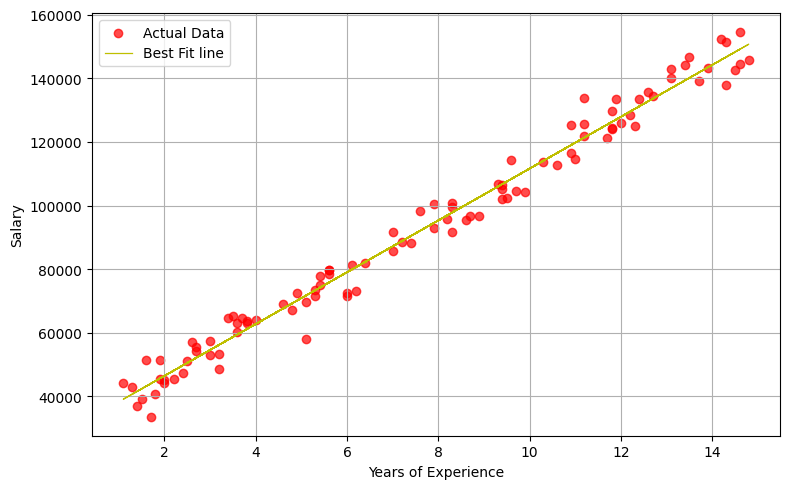

In [45]:
plt.figure(figsize=(8,5))
plt.scatter(df["YearsExperience"],df["Salary"],label="Actual Data",alpha=0.7,color="r")
plt.plot(df["YearsExperience"],y_pred,label="Best Fit line",color='y',linewidth=0.9)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

## Draw Residuals Line

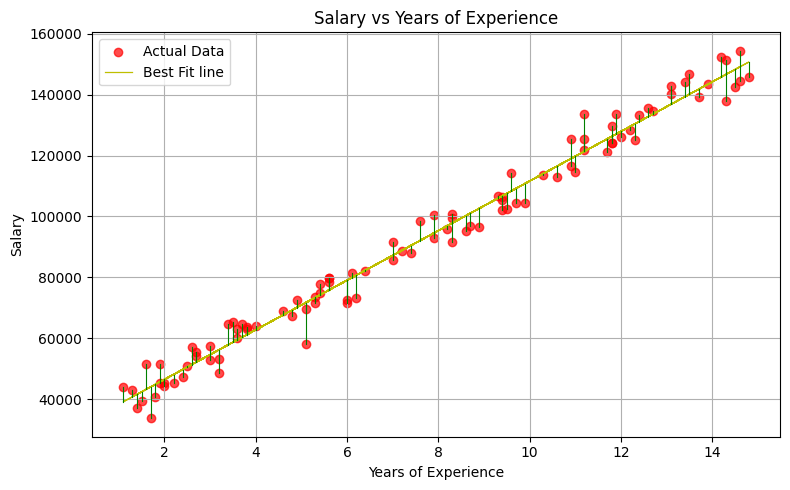

In [48]:
plt.figure(figsize=(8,5))
plt.scatter(df["YearsExperience"],df["Salary"],label="Actual Data",alpha=0.7,color="r")
plt.plot(df["YearsExperience"],y_pred,label="Best Fit line",color='y',linewidth=0.9)
for xi, yi, yhat in zip(df["YearsExperience"], df["Salary"], y_pred):
    plt.plot([xi, xi], [yi, yhat], linewidth=0.8, color="g")

plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()